In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from functionality import *

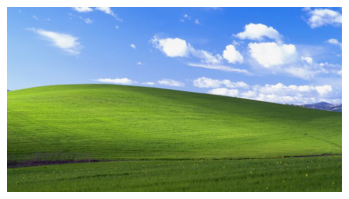

In [2]:
img = imread('test_images/img3.jpg').astype(int)[...,:3]
height, width, _ = img.shape
K = np.arange(2)
n_labels = len(K)
plt.axis('off')
plt.imshow(img)

In [3]:
# smoothing coef
beta = 10
# number of rows to take as a class0(sky)
n_rows = 75

In [4]:
g = get_g(height,width,n_labels,beta)
class0_mean, class0_cov, class1_mean, class1_cov = get_gmm_params(img, n_rows)
Q = get_q(img,class0_mean, class0_cov, class1_mean, class1_cov)

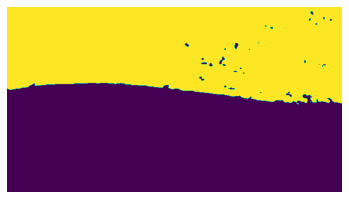

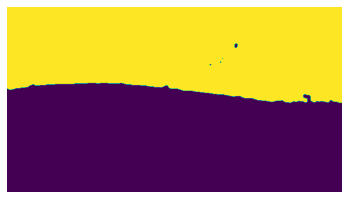

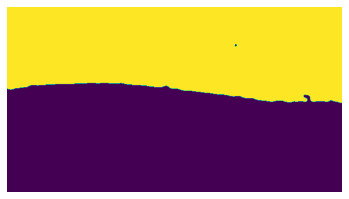

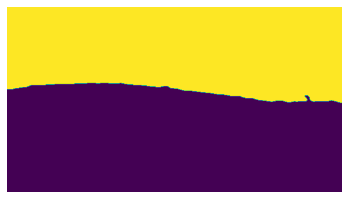

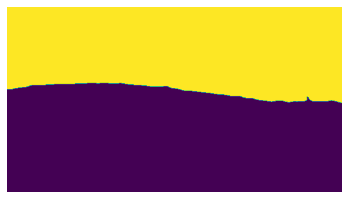

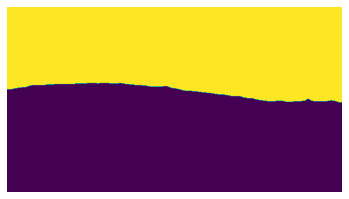

In [5]:
fi = np.zeros((height,width,4,n_labels))
for _ in range(10**3):
    fi = update_fi(height,width,fi,g,K,Q,5)
    labelling = get_labelling(height, width, g, fi)
    plt.imshow(labelling)
    plt.axis('off')
    plt.show()
    if check_smooth_border(labelling,height, width):
        break